In [51]:
# Render plots inline
%matplotlib inline

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Creating Dataframe
df=pd.read_csv("Titanic Dataset")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


# Describing the data

From a sample of the Titanic data, we can see the various features present for each passenger on the ship:

Survived: Outcome of survival (0 = No; 1 = Yes)
Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
Name: Name of passenger
Sex: Sex of the passenger
Age: Age of the passenger (Some entries contain NaN)
SibSp: Number of siblings and spouses of the passenger aboard
Parch: Number of parents and children of the passenger aboard
Ticket: Ticket number of the passenger
Fare: Fare paid by the passenger
Cabin Cabin number of the passenger (Some entries contain NaN)
Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

# Data Cleanup 

Removing duplicate entries

In [18]:
titanic_duplicates = df.duplicated()
print ('Number of duplicate entries is/are {}'.format(titanic_duplicates.sum()))

Number of duplicate entries is/are 0


Removing unnecessary columns not required for the prediction


In [20]:
#Columns (PassengerId, Name, Ticket, Cabin, Fare, Embarked) needs to be remmoved
titanic_cleaned = df.drop(['PassengerId','Name','Ticket','Cabin','Fare','Embarked'], axis=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


Fixing any missing values

In [22]:
# Calculating number of missing values
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
dtype: int64

In [24]:
# Reviewing some of the missing Age data
missing_age = pd.isnull(titanic_cleaned['Age'])
titanic_cleaned[missing_age].head()

,Survived,Pclass,Sex,Age,SibSp,Parch
5,0,3,male,NaN,0,0
17,1,2,male,NaN,0,0
19,1,3,female,NaN,0,0
26,0,3,male,NaN,0,0
28,1,3,female,NaN,0,0


In [33]:
# Determine number of males and females with missing age values
missing_age_female = titanic_cleaned[missing_age]['Sex'] == 'female'
missing_age_male = titanic_cleaned[missing_age]['Sex'] == 'male'

print ('Number for females and males with age missing are {} and {} respectively'.format(missing_age_female.sum(),missing_age_male.sum()))

Number for females and males with age missing are 53 and 124 respectively


Note: Age missing in male data: 124
Age missing in female data: 53

# Data Exploration and Visualisation

In [36]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


In [39]:
titanic_cleaned[titanic_cleaned['Age'] < 1]
#Age showing as less than 1, need to evaluate that 

,Survived,Pclass,Sex,Age,SibSp,Parch
78,1,2,male,0.83,0,2
305,1,1,male,0.92,1,2
469,1,3,female,0.75,2,1
644,1,3,female,0.75,2,1
755,1,2,male,0.67,1,1
803,1,3,male,0.42,0,1
831,1,2,male,0.83,1,1


In [43]:

# Taking a look at some survival rates for babies
youngest_to_survive = titanic_cleaned[titanic_cleaned['Survived'] == True]['Age'].min()
youngest_to_die = titanic_cleaned[titanic_cleaned['Survived'] == False]['Age'].min()
oldest_to_survive = titanic_cleaned[titanic_cleaned['Survived'] == True]['Age'].max()
oldest_to_die = titanic_cleaned[titanic_cleaned['Survived'] == False]['Age'].max()

print ('Youngest to survive: {} \nYoungest to die: {} \nOldest to survive: {} \nOldest to die: {}'.format(youngest_to_survive, youngest_to_die, oldest_to_survive, oldest_to_die))

Youngest to survive: 0.42 
Youngest to die: 1.0 
Oldest to survive: 80.0 
Oldest to die: 74.0


All "new borns" survived.

Other notable stats
Oldest to survive: 80
Oldest to die: 74
Youngest to survive: < 1 (0.42)
Youngest to die: 1

Pred1: Regardless of sex and class, age determines the chances of survival

Number of men and woman with age missing are 53 and 124 respectively
Total number of survivors 290 
Total number of non survivors 424 
Mean age of survivors 28.0 
Mean age of non survivors 31.0 
Oldest to survive 80.0 
Oldest to not survive 74.0


C:\Users\nikit\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nikit\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


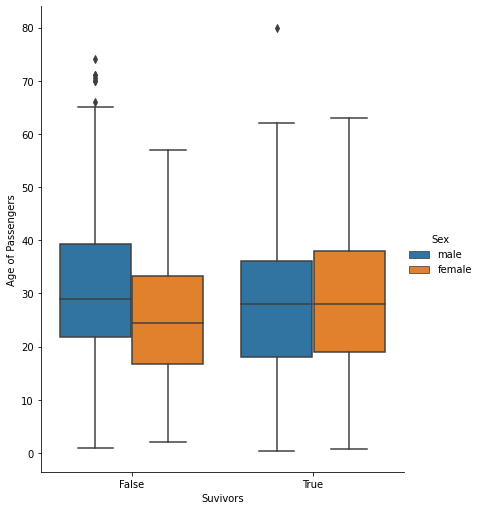

In [55]:

# Let us first identify and get rid of records with missing Age
print ('Number of men and woman with age missing are {} and {} respectively'.format(
missing_age_female.sum(),missing_age_male.sum()))

# Drop the NaN values. Calculations will be okay with them (seen as zero) but will throw off averages and counts
titanic_data_age_cleaned = titanic_cleaned.dropna()

# Find total count of survivors and those who didn't
number_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Survived'].count()
number_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Survived'].count()

# Find average of survivors and those who didn't
mean_age_survived = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == True]['Age'].mean()
mean_age_died = titanic_data_age_cleaned[titanic_data_age_cleaned['Survived'] == False]['Age'].mean()

# Display a few raw totals
print ('Total number of survivors {} \n\
Total number of non survivors {} \n\
Mean age of survivors {} \n\
Mean age of non survivors {} \n\
Oldest to survive {} \n\
Oldest to not survive {}' \
.format(number_survived, number_died, np.round(mean_age_survived), 
        np.round(mean_age_died), oldest_to_survive, oldest_to_die))

# Graph - Age of passengers across sex of those who survived
g = sns.factorplot(x="Survived", y="Age", hue='Sex', data=titanic_data_age_cleaned, kind="box", size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'Age of Passengers')
    .set_xticklabels(["False", "True"])
)

Based on the above boxplot and calculated data, it would appear that:

Regardless of sex and class, age was not a deciding factor in the passenger survival rate
Average age for those who survived and even those who did not survive were inline with eachother

Prediction 2: Socio-Economic is a factor in survival rate

In [62]:
# Returns survival rate/percentage of sex and class
def survival_rate(pclass, sex):
    """
    Args:
        pclass: class value 1,2 or 3
        sex: male or female
    Returns:
        survival rate as percentage.
    """
    grouped_by_total = titanic_cleaned.groupby(['Pclass', 'Sex']).size()[pclass,sex].astype('float')
    grouped_by_survived_sex = \
        titanic_cleaned.groupby(['Pclass','Survived','Sex']).size()[pclass,1,sex].astype('float')
    survived_sex_pct = (grouped_by_survived_sex / grouped_by_total * 100).round(2)
    
    return survived_sex_pct

Pclass  Survived  Sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64
Class 1 - female survival rate: 96.81%
Class 1 - male survival rate: 36.89%
-----
Class 2 - female survival rate: 92.11%
Class 2 - male survival rate: 15.74%
-----
Class 3 - female survival rate: 50.0%
Class 3 - male survival rate: 13.54%


C:\Users\nikit\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nikit\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\nikit\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\nikit\anaconda3\lib\site-packages\seaborn\categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height

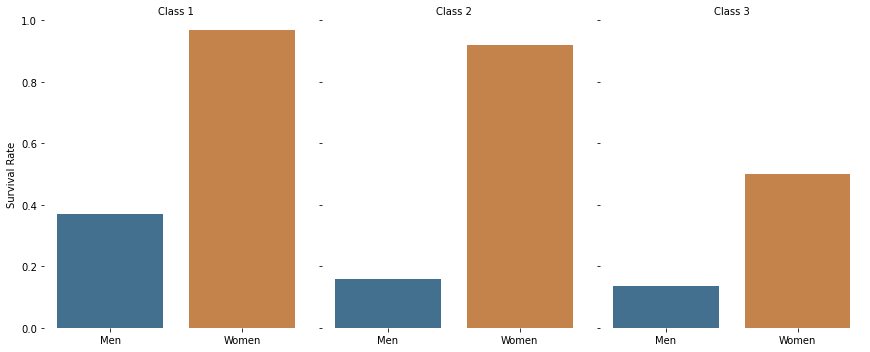

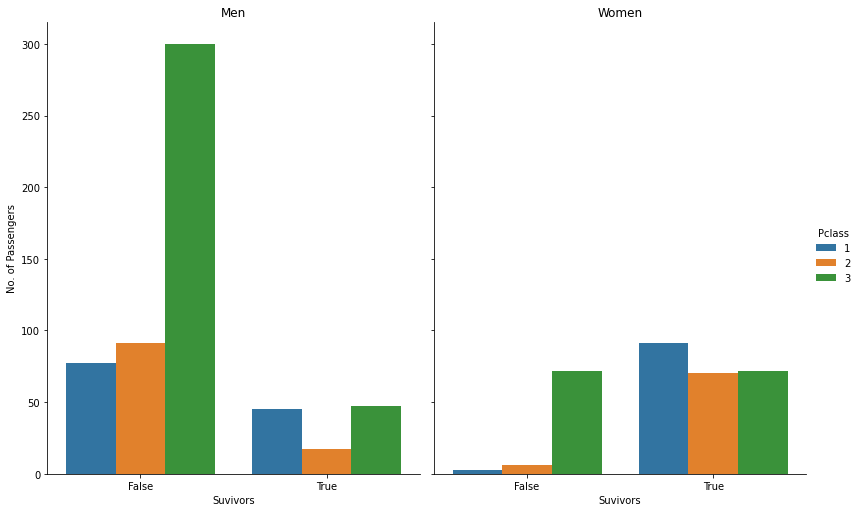

In [63]:
# Get the actual numbers grouped by class, suvival and sex
groupedby_class_survived_size = titanic_cleaned.groupby(['Pclass','Survived','Sex']).size()

# Print - Grouped by class, survival and sex
print (groupedby_class_survived_size)
print ('Class 1 - female survival rate: {}%'.format(survival_rate(1,'female')))
print ('Class 1 - male survival rate: {}%'.format(survival_rate(1,'male')))
print ('-----')
print ('Class 2 - female survival rate: {}%'.format(survival_rate(2,'female')))
print ('Class 2 - male survival rate: {}%'.format(survival_rate(2,'male')))
print ('-----')
print ('Class 3 - female survival rate: {}%'.format(survival_rate(3,'female')))
print ('Class 3 - male survival rate: {}%'.format(survival_rate(3,'male')))

# Graph - Grouped by class, survival and sex
g = sns.factorplot(x="Sex", y="Survived", col="Pclass", data=titanic_cleaned, 
                   saturation=.5, kind="bar", ci=None, size=5, aspect=.8)

# Fix up the labels
(g.set_axis_labels('', 'Survival Rate')
     .set_xticklabels(["Men", "Women"])
     .set_titles("Class {col_name}")
     .set(ylim=(0, 1))
     .despine(left=True, bottom=True))

# Graph - Actual count of passengers by survival, group and sex
g = sns.factorplot('Survived', col='Sex', hue='Pclass', data=titanic_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(["False", "True"])
    .set_titles('{col_name}')
)

titles = ['Men', 'Women']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

Prediction 3: Women and children given preference to lifeboats and therefore survival

C:\Users\nikit\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\nikit\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\nikit\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

Category  Survived
Child     0            52
          1            61
Man       0           325
          1            70
Woman     0            47
          1           159
dtype: int64


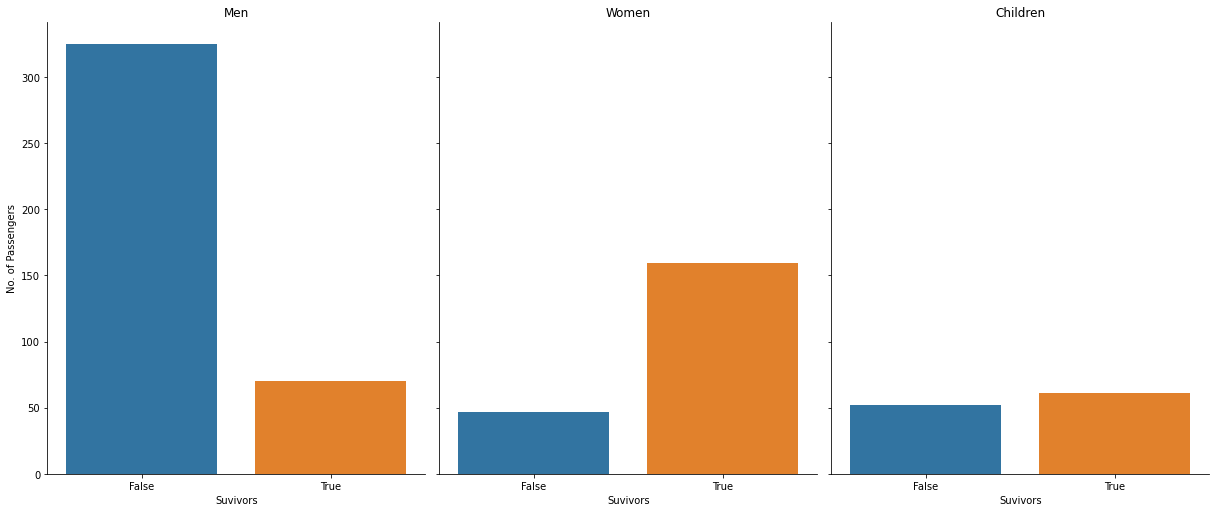

In [66]:

# Create Cateogry column and categorize people
titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'female') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Woman'

titanic_data_age_cleaned.loc[
    ( (titanic_data_age_cleaned['Sex'] == 'male') & 
    (titanic_data_age_cleaned['Age'] >= 18) ),
    'Category'] = 'Man'

titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Age'] < 18),
    'Category'] = 'Child'

# Get the totals grouped by Men, Women and Children, and by survival
print (titanic_data_age_cleaned.groupby(['Category','Survived']).size())

# Graph - Compare survival count between Men, Women and Children
g = sns.factorplot('Survived', col='Category', data=titanic_data_age_cleaned, kind='count', size=7, aspect=.8)

# Fix up the labels
(g.set_axis_labels('Suvivors', 'No. of Passengers')
    .set_xticklabels(['False', 'True'])
)

titles = ['Men', 'Women', 'Children']
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)

The data, and more so, the graphs tends to support the idea that "women and children first" possibly played a role in the survival of a number of people. It's a bit surprising that more children didn't survive but this could possibly be attributed to the mis-representation of what age is considered as the cut off for adults - i.e. if in the 1900's someone 15-17 were considered adults, they would not have been "saved" under the "women and children first" idea and would be made to fend for themselves. That would in turn, change the outcome of the above data and possible increase the number of children who survived.

Prediction 4: Women with children have better survival rate vs women without children

In [69]:

# Determine number of woman that are not parents
titanic_data_woman_parents = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Woman') &
    (titanic_data_age_cleaned['Parch'] > 0)]

# Determine number of woman over 20 that are not parents
titanic_data_woman_parents_maybe = titanic_data_age_cleaned.loc[
    (titanic_data_age_cleaned['Category'] == 'Woman') &
    (titanic_data_age_cleaned['Parch'] > 0) & 
    (titanic_data_age_cleaned['Age'] > 20)]

In [70]:
titanic_data_woman_parents.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Category
8,1,3,female,27.0,0,2,Woman
25,1,3,female,38.0,1,5,Woman
88,1,1,female,23.0,3,2,Woman
98,1,2,female,34.0,0,1,Woman
136,1,1,female,19.0,0,2,Woman


In [71]:

titanic_data_woman_parents_maybe.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Category
8,1,3,female,27.0,0,2,Woman
25,1,3,female,38.0,1,5,Woman
88,1,1,female,23.0,3,2,Woman
98,1,2,female,34.0,0,1,Woman
167,0,3,female,45.0,1,4,Woman


An issue is that A woman with Age: 23 and Parch: 2 could be onboard with her children OR onboard with her parents. Based on the 'Parch' definition provided in the data description, Parch - number of parents or children on board, it's possible to accurately determine women with children (parents) vs women with their parents onboard.

# Conclusion

The results of the analysis, although tentative, would appear to indicate that class and sex, namely, being a female with upper social-economic standing (first class), would give one the best chance of survival when the tragedy occurred on the Titanic. Age did not seem to be a major factor. While being a man in third class, gave one the lowest chance of survival. Women and children, across all classes, tend to have a higher survival rate than men in genernal but by no means did being a child or woman guarentee survival.